# Probabilistic Graphical Models — Exploratory Notebook

This notebook contains worked examples and exploratory experiments illustrating basic probability, independence, inference with simple models, and small simulation studies.

Some of questions below aren't specified in great detail and you may need to spend sometime making sense of the questions themselves, which you can do from the reads and other sources.  You also might need to fill in some blanks or make some assumptions.  The spirit behind this approach is explained in [The Problem with Problems](http://web.mit.edu/6.969/www/readings/mazur.pdf) by Eric Mazur, which I encourage everyone to read.

## Author: Ilke Kas (ixk238)

In [4]:
#import some libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, beta, norm, poisson, gamma
from scipy.special import factorial

## Section 1 — Basic probability

In the proofs below use general probability distributions and the basic laws of probability. Be concise and clear; present proofs in terms of mathematical facts of probability theory.

1.1. Prove

$$ p(x,y|z) = p(x|z)p(y|x,z) $$

#### Notes:
- Since we know that the chain rule of the conditional probability for three random variables:

$$ p(x,y,z) = p(y |x,z)p(x|z)p(z) \tag{1}$$

- We want to get the probability $ p(x,y|z) $ from the full joint probability $ p(x,y,z) = p(y |x,z)p(x|z)p(z)$.
- By the definition of the conditional probability, we know that:

$$ p(x,y|z) = \frac{p(x,y,z)}{p(z)} \tag{2}$$

- If we substitute the equation in (1) into equation (2), we get:

$$ p(x,y|z) = \frac{p(y |x,z)p(x|z)p(z)}{p(z)} \tag{3}$$

- Canceling $p(z)$ from numerator and denominator yields the desired identity:

$$ p(x,y|z) = p(y |x,z)p(x|z) \tag{4}$$

1.2. Prove

$$ p(x|y,z) = \frac{p(y|x,z)p(x|z)}{p(y|z)} $$

#### Notes:
- By the definition of conditional probability:

$$ p(x|y,z) = \frac{p(x,y,z)}{p(y,z)} \tag{5} $$

- Using the chain rule for the joint:

$$ p(x|y,z) = \frac{ p(y |x,z)p(x|z)p(z) }{p(y,z)} \tag{6} $$

- For the denominator:

$$ p(y,z) = p(y|z)p(z) \tag{7}$$

- Substituting (7) into (6) and canceling $p(z)$ gives:

$$ p(x|y,z) = \frac{ p(y |x,z)p(x|z)}{p(y|z)} \tag{9} $$

- This completes the derivation.


## Section 2 — Independence

These proofs use general probability distributions and the basic laws of probability. Present the arguments mathematically rather than relying on world knowledge.

2.1 Show that independence is not transitive, i.e.

$$a \perp b \wedge b \perp c \nRightarrow a \perp c$$

Provide a joint distribution that demonstrates this.

#### Notes:
- When we say $a \perp b$, it means $p(a,b) = p(a)p(b)$. Similarly $b \perp c$ means $p(b,c) = p(b)p(c)$. These two statements do not imply $a \perp c$.

- Consider the following counterexample with three binary variables and the joint distribution specified below (table omitted here for brevity). This construction shows $a \perp b$ and $b \perp c$ while $a$ and $c$ are dependent.

2.2 Show that conditional independence does not imply marginal independence, i.e.

$$a \perp b | c \nRightarrow a \perp b$$

Provide an example illustrating the statement.

#### Notes:
- Conditional independence means $P(a|b,c) = P(a|c)$. Use a small discrete table to show that $P(a|b) \neq P(a)$ can hold even when conditional independence given $c$ is true.


## Section 3 — Inspector Clouseau (example)

3.1 Evaluate p(B|K) from the referenced example. Implement a small program to compute the probability and verify the numerical result.


In [8]:
# I defined random variables as classes
class Butler:
    def __init__(self,murderer,true_prob):  
        self.murderer = murderer
        if murderer:
            self.prob = true_prob
        else:
            self.prob = 1 - true_prob

    def display_info(self):  
        print(f"P(B={self.murderer})={self.prob}")
        return f"P(B={self.murderer})={self.prob}"

class Maid:
    def __init__(self,murderer,true_prob):  
        self.murderer = murderer
        if murderer:
            self.prob = true_prob
        else:
            self.prob = 1-true_prob

    def display_info(self):  
        print(f"P(M={self.murderer})= {self.prob}")
        return f"P(M={self.murderer})= {self.prob}"

class Knife_Cond:
    def __init__(self,used,butler, maid, Butler_NM_Maid_NM_prob, Butler_NM_Maid_M_prob, Butler_M_Maid_NM_prob, Butler_M_Maid_M_prob ):     
        self.used = used
        self.butler = butler
        self.maid = maid
        if not butler.murderer and not maid.murderer:
            self.prob = Butler_NM_Maid_NM_prob
        elif not butler.murderer and maid.murderer:
            self.prob = Butler_NM_Maid_M_prob
        elif butler.murderer and not maid.murderer:
            self.prob= Butler_M_Maid_NM_prob
        elif butler.murderer and maid.murderer:
            self.prob = Butler_M_Maid_M_prob

        if not self.used:
            self.prob = 1-self.prob


    def display_info(self):  
        print(f"P(K={self.used}| B={self.butler.murderer}, M={self.maid.murderer})={self.prob}")
        return f"P(K={self.used}| B={self.butler.murderer}, M={self.maid.murderer})={self.prob}"
    

In [9]:
maid_NM = Maid(False,0.2)
maid_M = Maid(True,0.2)

butler_NM = Butler(False,0.6)
butler_M = Butler(True,0.6)

print("=========================Conditional Probabilities are =====================")
all_cases = [
    (False, butler_NM, maid_NM),
    (False, butler_NM, maid_M),
    (False, butler_M, maid_NM),
    (False, butler_M, maid_M),
    (True, butler_NM, maid_NM),
    (True, butler_NM, maid_M),
    (True, butler_M, maid_NM),
    (True, butler_M, maid_M),
]

for used, butler, maid in all_cases:
    kc = Knife_Cond(used,butler, maid,0.3,0.2,0.6,0.1)
    kc.display_info()

print("========================== Joint Probabilities are ====================================================")
sum_prob = 0
for used, butler, maid in all_cases:
    kc = Knife_Cond(used, butler, maid,0.3,0.2,0.6,0.1)
    joint_prob = kc.prob * maid.prob * butler.prob
    sum_prob += joint_prob
    print(f"Joint_Prob P(K={used}, B={butler.murderer}, M={maid.murderer}) = ({kc.prob} * {butler.prob} * {maid.prob}) = {joint_prob}")
print("Sum of the joint probabilities are " + str(sum_prob))

=========================Conditional Probabilities are =====================
P(K=False| B=False, M=False)=0.7
P(K=False| B=False, M=True)=0.8
P(K=False| B=True, M=False)=0.4
P(K=False| B=True, M=True)=0.9
P(K=True| B=False, M=False)=0.3
P(K=True| B=False, M=True)=0.2
P(K=True| B=True, M=False)=0.6
P(K=True| B=True, M=True)=0.1
========================== Joint Probabilities are ====================================================
Joint_Prob P(K=False, B=False, M=False) = (0.7 * 0.4 * 0.8) = 0.22399999999999998
Joint_Prob P(K=False, B=False, M=True) = (0.8 * 0.4 * 0.2) = 0.06400000000000002
Joint_Prob P(K=False, B=True, M=False) = (0.4 * 0.6 * 0.8) = 0.19200000000000003
Joint_Prob P(K=False, B=True, M=True) = (0.9 * 0.6 * 0.2) = 0.10800000000000001
Joint_Prob P(K=True, B=False, M=False) = (0.3 * 0.4 * 0.8) = 0.096
Joint_Prob P(K=True, B=False, M=True) = (0.2 * 0.4 * 0.2) = 0.016000000000000004
Joint_Prob P(K=True, B=True, M=False) = (0.6 * 0.6 * 0.8) = 0.288
Joint_Prob P(K=True, B=True, 

##### Assuming that the knife is the murder weapon. What is the prob_that the butler is the murderer P(B|K)?

In [11]:
# given probabilities in the original problem (from the slide)
Butler_NM_Maid_NM, Butler_NM_Maid_M, Butler_M_Maid_NM, Butler_M_Maid_M = 0.3, 0.2, 0.6, 0.1

# compute Joint Probabilities
joint_probs = {}
P_K = 0
P_B_K = 0

for used, butler, maid in all_cases:
    kc = Knife_Cond(used, butler, maid, Butler_NM_Maid_NM, Butler_NM_Maid_M, Butler_M_Maid_NM, Butler_M_Maid_M)
    joint_prob = kc.prob * maid.prob * butler.prob
    joint_probs[(used, butler.murderer, maid.murderer)] = joint_prob

    if used:
        P_K += joint_prob
        if butler.murderer:
            P_B_K += joint_prob

# compute P(B | K)
P_B_given_K = P_B_K / P_K if P_K > 0 else 0

# print the result
print(f"P(B | K) = {P_B_given_K:.4f}")


P(B | K) = 0.7282


As seen we found 0.73 approximately for the probability P(B|K) as given in the slide.

3.2 Propose an alternative conditional distribution p(K|M,B) that yields stronger evidence (p(B|K) < 0.1 or > 0.9). Justify your choices for each table entry.

In [14]:
# defined conditional probabilities by me
Butler_NM_Maid_NM, Butler_NM_Maid_M, Butler_M_Maid_NM, Butler_M_Maid_M = 0.1, 0.15, 0.8, 0.7
print("=========================Conditional Probabilities Given by Me are =====================")
for used, butler, maid in all_cases:
    kc = Knife_Cond(used,butler, maid,Butler_NM_Maid_NM, Butler_NM_Maid_M, Butler_M_Maid_NM, Butler_M_Maid_M)
    kc.display_info()
print("==============================================")
# compute Joint Probabilities
joint_probs = {}
P_K = 0
P_B_K = 0

for used, butler, maid in all_cases:
    kc = Knife_Cond(used, butler, maid, Butler_NM_Maid_NM, Butler_NM_Maid_M, Butler_M_Maid_NM, Butler_M_Maid_M)
    joint_prob = kc.prob * maid.prob * butler.prob
    joint_probs[(used, butler.murderer, maid.murderer)] = joint_prob

    if used:
        P_K += joint_prob
        if butler.murderer:
            P_B_K += joint_prob

# compute P(B | K)
P_B_given_K = P_B_K / P_K if P_K > 0 else 0

# print the result
print(f"P(B | K) = {P_B_given_K:.4f}")



=========================Conditional Probabilities Given by Me are =====================
P(K=False| B=False, M=False)=0.9
P(K=False| B=False, M=True)=0.85
P(K=False| B=True, M=False)=0.19999999999999996
P(K=False| B=True, M=True)=0.30000000000000004
P(K=True| B=False, M=False)=0.1
P(K=True| B=False, M=True)=0.15
P(K=True| B=True, M=False)=0.8
P(K=True| B=True, M=True)=0.7
P(B | K) = 0.9141


I give the above values for the conditional probabilities to make the outcome of P(B|K) > 0.9. In order to increase this probabiliteis, I gave smaller values to the conditional probabilies P(K=False|B=True,M) or P(K=True|B=False,M) since I want them have higher probability when they occur together or not occur together. 

3.3 Derive the equation for p(M|K) (express the marginalization and normalization steps clearly).

Let's derive the equation for $P(M|K)$.
- $$ P(M|K) = \sum_{b} \frac{P(b,M,K)}{P(K)} = \frac{\sum_{b} P(K|b,M)P(b,M)}{\sum_{m,b} P(K|b,m)P(b,m)}$$
- Since we assume that butler and the maid are not colluding (they are independent (from the last page of slide L2 in lectures)), we can use this equation too:
- $$ P(M|K) = \sum_{b} \frac{P(b,M,K)}{P(K)} = \frac{\sum_{b} P(K|b,M)P(b)P(M)}{\sum_{m,b} P(K|b,m)P(b)P(m)} \tag{13}$$

3.4 Compute p(M|K) for both the original and the modified p(K|M,B). Summarize the main factors that drive the posterior (likelihood entries, priors, normalization) and comment on identifiability.

In [19]:
# given probabilities in the original problem (from the slide)
Butler_NM_Maid_NM, Butler_NM_Maid_M, Butler_M_Maid_NM, Butler_M_Maid_M = 0.3, 0.2, 0.6, 0.1

# compute Joint Probabilities
joint_probs = {}
P_K = 0
P_M_K = 0

for used, butler, maid in all_cases:
    kc = Knife_Cond(used, butler, maid, Butler_NM_Maid_NM, Butler_NM_Maid_M, Butler_M_Maid_NM, Butler_M_Maid_M)
    joint_prob = kc.prob * maid.prob * butler.prob
    joint_probs[(used, butler.murderer, maid.murderer)] = joint_prob

    if used:
        P_K += joint_prob
        if maid.murderer:
            P_M_K += joint_prob

# compute P(B | K)
P_M_given_K = P_M_K / P_K if P_K > 0 else 0

# print the result
print(f"P(M | K) = {P_M_given_K:.4f}")

P(M | K) = 0.0680


In [20]:
# given probabilities by me
Butler_NM_Maid_NM, Butler_NM_Maid_M, Butler_M_Maid_NM, Butler_M_Maid_M = 0.1, 0.15, 0.8, 0.7

# compute Joint Probabilities
joint_probs = {}
P_K = 0
P_M_K = 0

for used, butler, maid in all_cases:
    kc = Knife_Cond(used, butler, maid, Butler_NM_Maid_NM, Butler_NM_Maid_M, Butler_M_Maid_NM, Butler_M_Maid_M)
    joint_prob = kc.prob * maid.prob * butler.prob
    joint_probs[(used, butler.murderer, maid.murderer)] = joint_prob

    if used:
        P_K += joint_prob
        if maid.murderer:
            P_M_K += joint_prob

# compute P(B | K)
P_M_given_K = P_M_K / P_K if P_K > 0 else 0

# print the result
print(f"P(M | K) = {P_M_given_K:.4f}")

P(M | K) = 0.1875


For the original $p(K|M, B)$, the probability $ P(M|K) $ is:$P(M|K) = 0.0680$ For the updated $ p(K|M, B) $, the probability $ P(M|K) $ is:$
P(M|K) = 0.1875$.

The increase in $ P(M|K) $ is due to changes in the likelihoods $ P(K|M, B) $:

1. **Higher $ P(K|B=\text{True}, M=\text{True}) $**:
   - Original: $ P(K|B=\text{True}, M=\text{True}) = 0.1 $
   - Updated: $ P(K|B=\text{True}, M=\text{True}) = 0.7 $

2. **Higher $ P(K|B=\text{True}, M=\text{False}) $**:
   - Original: $ P(K|B=\text{True}, M=\text{False}) = 0.6 $
   - Updated: $ P(K|B=\text{True}, M=\text{False}) = 0.8 $

These changes increase both the numerator and denominator of $ P(M|K) $, but the net effect is an increase in the probability that the maid is the murderer given that the knife was used. Since the increase in the knife is used when the maid is the murderer is greater than the increase in the situation when knife is used when the maid is not the murderer. It is actually possible to provide main factors that contributes to the P(M|K) value. These are the main 3 elements of in the derived equation by me in equation (13) :

1. **The Likelihood $P(K|M, B)$**
2. **The Priors $P(M)$ and $P(B)$**
3. **Normalization factor $P(K)$**



## Section 4 — Biased views (coin bias)

This section explores different prior beliefs about a coin's bias and how posteriors update with data.

4.1 Compute the posterior distribution for θ (probability of heads) given y heads out of n trials (Binomial likelihood). You may use standard distributions from packages.

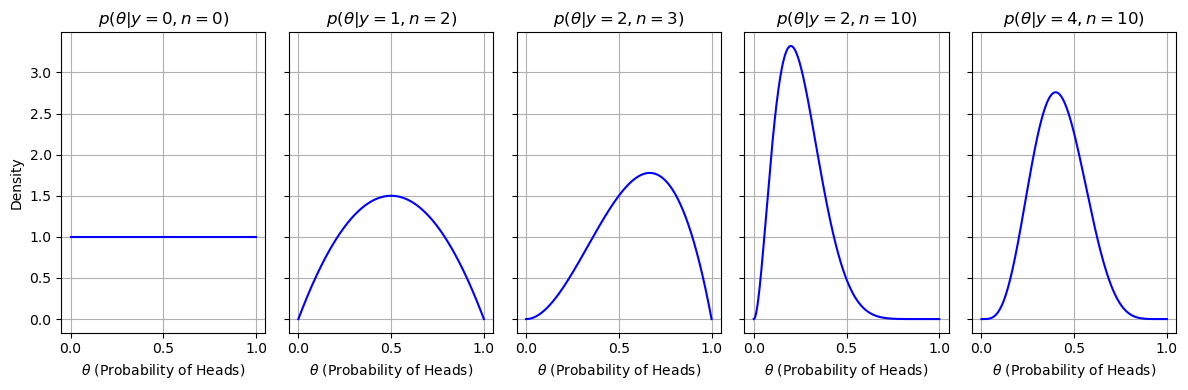

In [24]:
def calculate_posterior(y, n, theta_values):
    # used the binomial distribution in order to calculate the likelihood given y,n values
    # since prior is uninformative I make it all 1s
    likelihood = binom.pmf(y, n, theta_values)
    prior = np.ones_like(theta_values)
    # posterior is proprtional with the likelihood
    posterior = likelihood * prior
    # need to normalize the posterior to make it a valid probability distribution
    posterior /= np.trapz(posterior, theta_values)
    return posterior

# I tried three different values to see the calculation correctly and subplot them
trials = [(0, 0), (1,2),(2,3),(2, 10), (4, 10)]
theta_values = np.linspace(0, 1, 1000)
#create the subplots by iterating over the trials that i defined
fig, axes = plt.subplots(1, len(trials), figsize=(12, 4), sharey=True)
for ax, (y, n) in zip(axes, trials):
    posterior = calculate_posterior(y, n, theta_values)
    ax.plot(theta_values, posterior, color="blue")
    ax.set_title(r"$p(\theta | y=%d, n=%d)$" % (y, n))
    ax.set_xlabel(r"$\theta$ (Probability of Heads)")
    ax.grid(True)
axes[0].set_ylabel("Density")
plt.tight_layout()

4.2 Define three prior beliefs about coin bias:

- "Biased to either mostly heads or mostly tails".
- "Strongly believe the coin is unbiased".
- "No prior knowledge (uninformative)".

For each view, define a prior distribution and briefly explain the choice.

- Let's look at the first view:
- "I believe strongly that the coin is biased to either mostly heads or mostly tails."
- Solution: I believe that the mixture of three dirac distributions can express this belief. I said mixture since there are three belief in the expression one of them is being mostly head biased, and the other one is mostly tail biased. There is also prob that the coin is fair so this is the third option. I think these should be mixture of Dirac distribution since we have strong beliefs. I decided to give high probability for both the tailed and the headed phi (0.45) since the view reflects this. Then, I calculated the normal coin probability by subtracting it from the sum of the two other prior beliefs. 

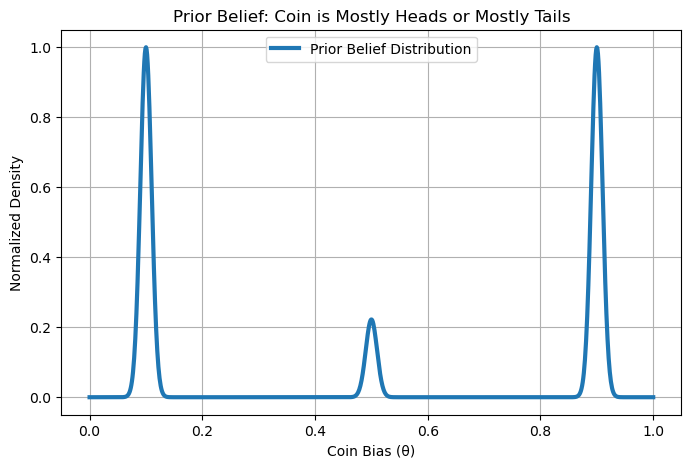

In [27]:
def compute_mixture_prior_belief_distribution(phi_mostlytailed=0.45, phi_mostlyheaded=0.45, dirac_width=0.01):
    # need to define the mixture model with Dirac deltas  since we have strong beliefs
    # I gave this very small value as width otherwise it gets very unobservable and not reflect my strong belief for the ends of the prob
    # compute remaining probability for a fair coin
    phi_normalcoin = 1 - (phi_mostlytailed + phi_mostlyheaded)
    theta = np.linspace(0, 1, 1000)
    # compute mixture model probability density function
    pdf_mixture = (
        phi_mostlytailed * norm.pdf(theta, loc=0.1, scale=dirac_width) +  # located at 0.1 since 0.1 means I have 1 head out of 10 trials. So, mostly tailed trials
        phi_normalcoin * norm.pdf(theta, loc=0.5, scale=dirac_width) +  # located at 0.5 since It should show the fair coin 
        phi_mostlyheaded * norm.pdf(theta, loc=0.9, scale=dirac_width)  # located at 0.9 since 0.9 means I have 9 head out of 10 trials. So, mostly headed trials
    )
    # need to normalize the mixture distribution to make the maximum value 1
    pdf_mixture /= np.max(pdf_mixture)
    
    return theta, pdf_mixture
    
theta, pdf_mixture = compute_mixture_prior_belief_distribution(phi_mostlytailed=0.45, phi_mostlyheaded=0.45, dirac_width=0.01)

# plot the prior belief distribution
plt.figure(figsize=(8, 5))
plt.plot(theta, pdf_mixture, lw=3, label="Prior Belief Distribution")
plt.xlabel("Coin Bias (θ)")
plt.ylabel("Normalized Density")
plt.title("Prior Belief: Coin is Mostly Heads or Mostly Tails")
plt.legend()
plt.grid(True)
plt.show()


- "I believe strongly that the coin is unbiased".
- Solution: I believe that the mixture of three dirac distributions can express this belief. I said mixture since there are three belief in the expression one and the strongest of them states that the coin is fair. However, there are also prob that the coin is heavily tailed or headed. I think these should be mixture of Dirac distribution since we have strong beliefs. I decided to give low probability for both the tailed and the headed phi (0.05) since the view reflects this. Then, I calculated the normal coin probability by subtracting it from the sum of the two other prior beliefs. SInce the head and tailed prob are low, I gave the fair option higher probability.

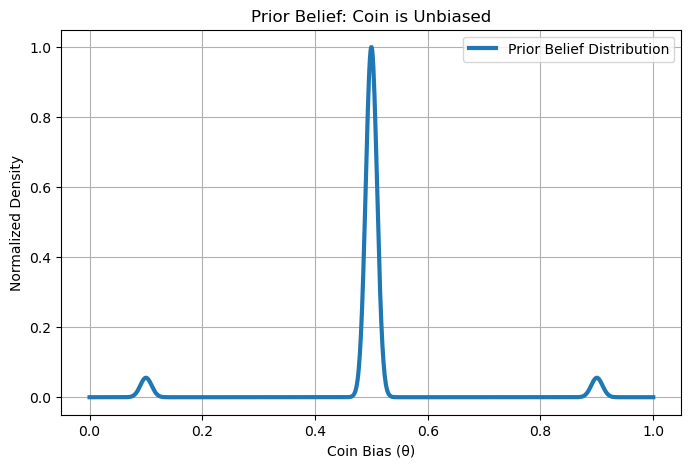

In [29]:
theta, pdf_mixture = compute_mixture_prior_belief_distribution(phi_mostlytailed=0.05, phi_mostlyheaded=0.05, dirac_width=0.01)

# Plot the prior belief distribution
plt.figure(figsize=(8, 5))
plt.plot(theta, pdf_mixture, lw=3, label="Prior Belief Distribution")
plt.xlabel("Coin Bias (θ)")
plt.ylabel("Normalized Density")
plt.title("Prior Belief: Coin is Unbiased")
plt.legend()
plt.grid(True)
plt.show()


- "I don't know anything about the bias of the coin."
- This means that we assume the prior $p(\theta)$ is *uninformative*, i.e. we have no a priori knowledge about $\theta$,then, we can use the uniform distribution as the prior. Therefore, we can use the Beta distribution. When $\alpha$=$\beta$, the distribution is symmetric and contains the uniform distribution as a special case ($\alpha = \beta = 1$).

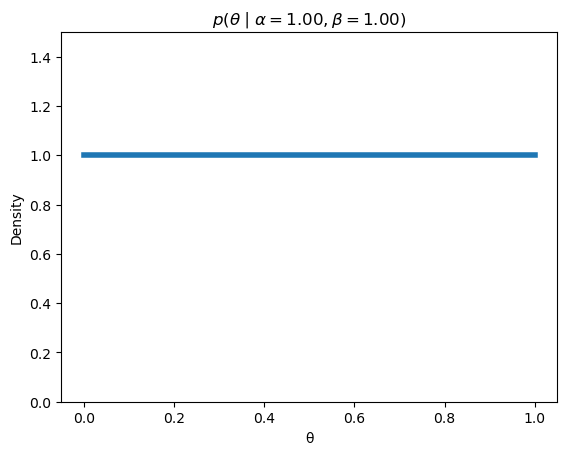

In [31]:
def plot_beta(alpha, beta_param, ylim=(0, 1.1), **plotkw):
    theta = np.linspace(0, 1, 501)
    pdf_values = beta.pdf(theta, alpha, beta_param)
    plt.plot(theta, pdf_values, lw=4, **plotkw)
    plt.ylim(ylim)
    plt.title(r"$p(\theta \mid \alpha=%.2f, \beta=%.2f)$" % (alpha, beta_param))
    plt.xlabel("θ")
    plt.ylabel("Density")
    plt.show()

plot_beta(alpha=1.0, beta_param=1.0, ylim=(0, 1.5))

4.3 Simulate Bernoulli trials (n = 0, 1, 2, 5, 10, 100) and show how the posterior for θ updates under each prior. Overlay posterior curves for different n to visualize learning.

- "I believe strongly that the coin is biased to either mostly heads or mostly tails."

In [34]:
# trial numbers to visualize
trial_counts = [0, 1, 2, 5, 10, 100,10000]
# lets say the true bias become 0.7
true_theta = 0.7
np.random.seed(42) # i added seed so you can also get the same result when you run

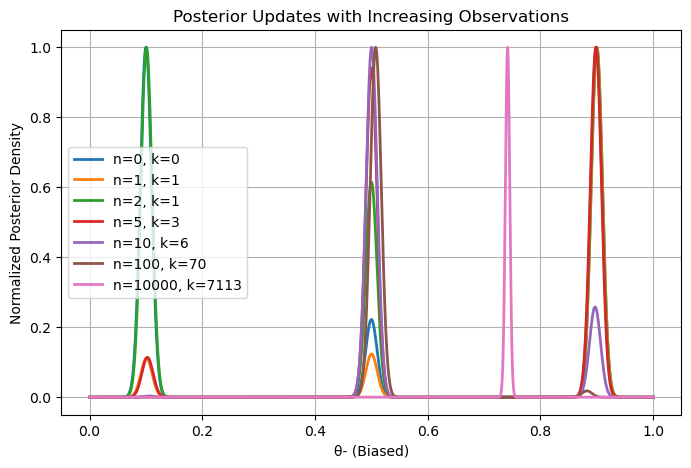

In [35]:
theta, prior= compute_mixture_prior_belief_distribution(phi_mostlytailed=0.45, phi_mostlyheaded=0.45, dirac_width=0.01)
#simulate via binomial distr
flips = np.random.binomial(1, true_theta, max(trial_counts))  

# plotting
plt.figure(figsize=(8, 5))

# for each trial number add new colored plot to graph
for n in trial_counts:
    k = np.count_nonzero(flips[:n] == 1) 
    # likelihood computation
    likelihood = binom.pmf(k, n, theta)
    # compute posterior
    posterior = likelihood * prior
    posterior /= np.max(posterior)
    plt.plot(theta, posterior, lw=2, label=f"n={n}, k={k}")
plt.xlabel("θ- (Biased)")
plt.ylabel("Normalized Posterior Density")
plt.title("Posterior Updates with Increasing Observations")
plt.legend()
plt.grid(True)
plt.show()

- "I believe strongly that the coin is unbiased".

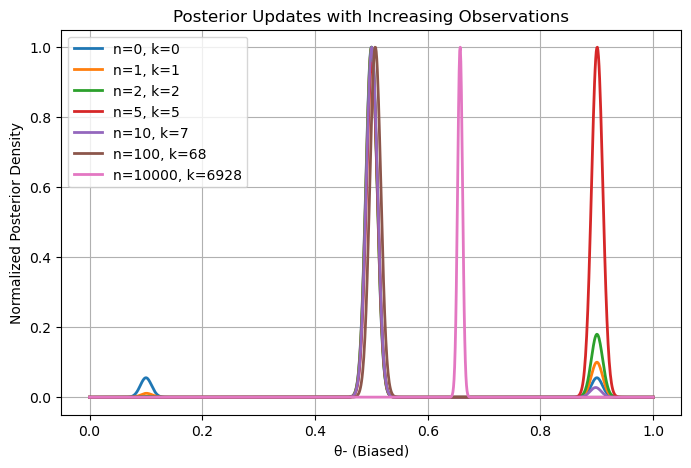

In [37]:
theta, prior= compute_mixture_prior_belief_distribution(phi_mostlytailed=0.05, phi_mostlyheaded=0.05, dirac_width=0.01)
#simulate via binomial distr
flips = np.random.binomial(1, true_theta, max(trial_counts))  

# plotting
plt.figure(figsize=(8, 5))

# for each trial number add new colored plot to graph
for n in trial_counts:
    k = np.count_nonzero(flips[:n] == 1) 
    # likelihood computation
    likelihood = binom.pmf(k, n, theta)
    # compute posterior
    posterior = likelihood * prior
    posterior /= np.max(posterior)
    plt.plot(theta, posterior, lw=2, label=f"n={n}, k={k}")
plt.xlabel("θ- (Biased)")
plt.ylabel("Normalized Posterior Density")
plt.title("Posterior Updates with Increasing Observations")
plt.legend()
plt.grid(True)
plt.show()

- "I don't know anything about the bias of the coin."

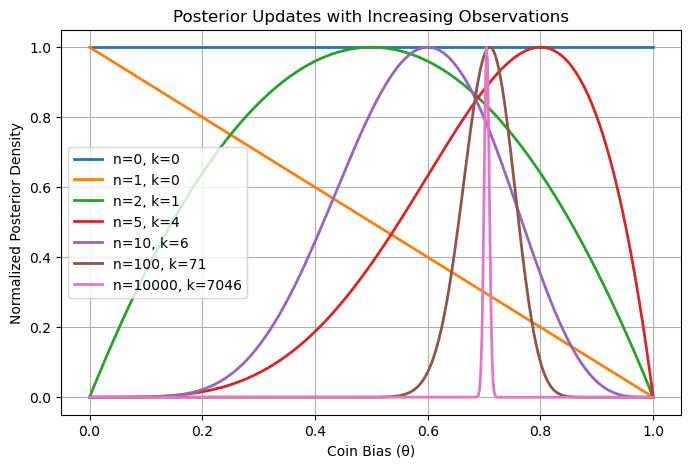

In [39]:
# function to plot the Beta distribution
def plot_beta(alpha, beta_param, label, **plotkw):
    theta = np.linspace(0, 1, 501)
    pdf_values = beta.pdf(theta, alpha, beta_param)
    pdf_values /= np.max(pdf_values)  # Normalize to max value = 1
    plt.plot(theta, pdf_values, lw=2, label=label, **plotkw)

# in order to get uniform prior beta=alpha=1.0 as we know from our lectures
alpha_prior = 1.0
beta_prior = 1.0
flips = np.random.binomial(1, true_theta, max(trial_counts)) 

# plotting
plt.figure(figsize=(8, 5))

for n in trial_counts:
    k = np.count_nonzero(flips[:n] == 1) #need to count the heads
    # update Beta posterior: Beta(alpha + k, beta + (n - k))
    # since beta is the conjuget can directly plot the beta distribution
    alpha_post = alpha_prior + k
    beta_post = beta_prior + (n - k)
    plot_beta(alpha_post, beta_post, label=f"n={n}, k={k}")

plt.xlabel("Coin Bias (θ)")
plt.ylabel("Normalized Posterior Density")
plt.title("Posterior Updates with Increasing Observations")
plt.legend()
plt.grid(True)
plt.show()

4.4 Discuss when and how each prior will recover the true θ, and how to compare which prior is most consistent with observed data after n trials (e.g., via marginal likelihoods or predictive checks).

I think it is possible for each view will arrive at an accurate estimate of $\theta$ when the trial number is increased around 10000 (which is a high number). We can determine which view is the most consistent by looking at the posterior graphs we plotted.I think, the view that approaches to the true theta in smaller number of trials is the most consistent one according to my trials. Therefore, I would choose the uninformativ (uniform trial) for this experiment. Because we will not always have that many power to try that big simulation especially in more complex examples with many random variables.

## Section 5 — Poisson inference

Model event arrivals with a Poisson process and perform likelihood and Bayesian updates for the event rate λ.

In [43]:
# here is the observed times  and data from the question
times = [0.53, 0.65, 0.91, 1.19, 1.30, 1.33, 1.90, 2.01, 2.48]
n = len(times) 
total_time = 3  

The Poisson likelihood function is defined as:

$$
L(\lambda) = \frac{(\lambda T)^n e^{-\lambda T}}{n!}
$$

where:
- $ \lambda $ is the rate of event occurrences per second,
- $ n $is the total number of observed events,
- $ T $ is the total observation time in seconds.

<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_606956/630234359.py:12: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(estimated_lambda - 1, color='red', linestyle='--', label=f'$\lambda$={estimated_lambda - 1} (low)')
/tmp/ipykernel_606956/630234359.py:13: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(estimated_lambda, color='green', linestyle='--', label=f'$\lambda$={estimated_lambda} (estimated)')
/tmp/ipykernel_606956/630234359.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(estimated_lambda + 1, color='blue', linestyle='--', label=f'$\lambda$={estimated_lambda + 1} (high)')


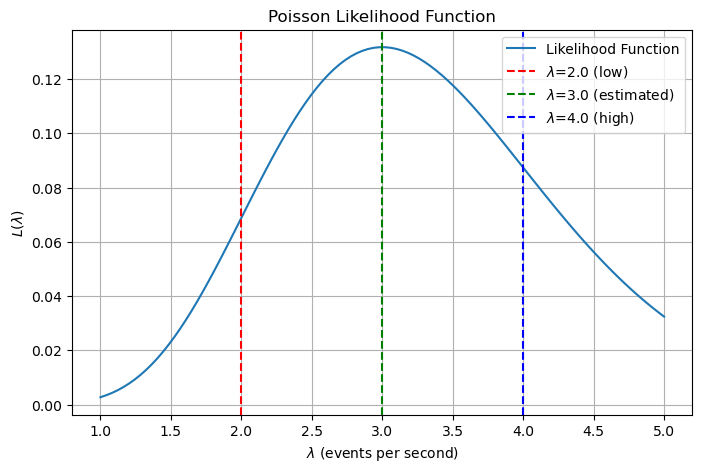

In [45]:
def poisson_likelihood(lmbda, n, T):
    return ((lmbda * T) ** n * np.exp(-lmbda * T)) / factorial(n)

def plot_poisson_likelihood(event_times, observation_time, n, lambda_range=(1, 5), num_points=100):
    lambda_values = np.linspace(lambda_range[0], lambda_range[1], num_points)
    likelihoods = poisson_likelihood(lambda_values, n, observation_time)
    
    estimated_lambda = n / observation_time  # Maximum likelihood estimate (MLE)
    
    plt.figure(figsize=(8, 5))
    plt.plot(lambda_values, likelihoods, label="Likelihood Function")
    plt.axvline(estimated_lambda - 1, color='red', linestyle='--', label=f'$\lambda$={estimated_lambda - 1} (low)')
    plt.axvline(estimated_lambda, color='green', linestyle='--', label=f'$\lambda$={estimated_lambda} (estimated)')
    plt.axvline(estimated_lambda + 1, color='blue', linestyle='--', label=f'$\lambda$={estimated_lambda + 1} (high)')
    plt.xlabel(r'$\lambda$ (events per second)')
    plt.ylabel(r'$L(\lambda)$')
    plt.title(r'Poisson Likelihood Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the likelihood function
plot_poisson_likelihood(times, total_time, n)

5.2 Derive the posterior for λ using a Gamma prior and show the analytic update for parameters (α' = α + n, β' = β + T).

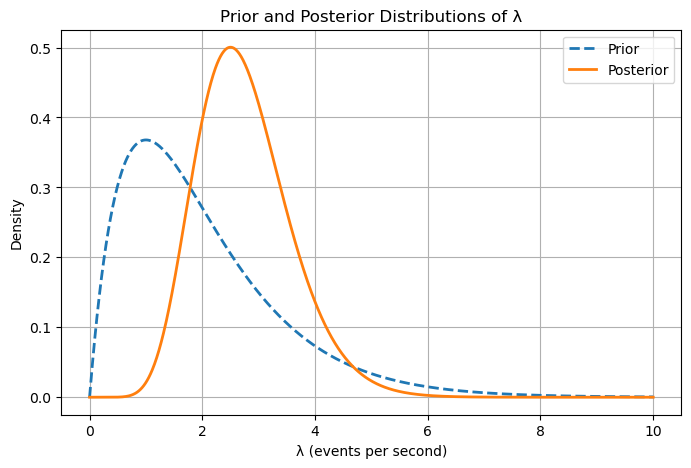

In [47]:
#p arameters for Gamma distribution
alpha = 2 
beta = 1  
alpha_post = alpha + n
beta_post = beta + total_time
lambda_values = np.linspace(0, 10, 1000)
# prior and posterior distributions
prior = gamma.pdf(lambda_values, a=alpha, scale=1/beta)
posterior = gamma.pdf(lambda_values, a=alpha_post, scale=1/beta_post)
# plotting
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, prior, label="Prior", linestyle="--", lw=2)
plt.plot(lambda_values, posterior, label="Posterior", lw=2)
plt.xlabel("λ (events per second)")
plt.ylabel("Density")
plt.title("Prior and Posterior Distributions of λ")
plt.legend()
plt.grid(True)
plt.show()

5.3 Show that the Gamma distribution is conjugate to the Poisson and state the updated parameters explicitly.

To show mathematically that the Gamma distribution is conjugate prior for the Poisson distribution, we need to demonstrate that the posterior distribution is also a Gamma distribution, with updated parameters $\alpha*$ and $\beta*$ that are functions of the prior parameters $\alpha, \beta$ and the likelihood parameters $n, T$.

The Gamma prior for$\lambda$ can be calculated by the following equation given:


$$p(\lambda | \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta \lambda} \tag{14}$$

In the equation (14), $\alpha$ shows the shape parameter while $\beta$ shows the rate parameter. While $\alpha$ parameter shows the graph is more skewed or symmetric, $\beta$ parameter controls how spread out the distribution is.

Secondly, as we know the likelihood of possion distribution observing n events in time T is given by the Poisson distribution:


$$p(n | \lambda, T) = \frac{(\lambda T)^n e^{-\lambda T}}{n!} \tag{15}$$

Based on these information, by using the Bayes' theorem,we can calculate the posterior distribution as proportional to the product of the prior and the likelihood:

$$ p(\lambda | n, T, \alpha, \beta) \propto p(n | \lambda, T) \cdot p(\lambda | \alpha, \beta) \tag{16}$$


Let's substitute the expressions in (14) and (15) into the (16) to calculate the posterior. THen we will get:


$$ p(\lambda | n, T, \alpha, \beta) \propto \left( \frac{(\lambda T)^n e^{-\lambda T}}{n!} \right) \cdot \left( \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta \lambda} \right) \tag{17}$$


If we simplify the expression we will get the followimng equation in (18):


$$p(\lambda | n, T, \alpha, \beta) \propto \lambda^n e^{-\lambda T} \cdot \lambda^{\alpha-1} e^{-\beta \lambda} \tag{18}$$

Finally:

$$p(\lambda | n, T, \alpha, \beta) \propto \lambda^{\alpha + n - 1} e^{-\lambda (\beta + T)} \tag{19}$$

THis expression is one part of the Gamma distribution (not the normalization constant one). So, the posterior distribution is:


$$p(\lambda | n, T, \alpha, \beta) = \frac{(\beta + T)^{\alpha + n}}{\Gamma(\alpha + n)} \lambda^{\alpha + n - 1} e^{-\lambda (\beta + T)} \tag{20}$$


By looking at the equation in (20), we can see that the posterior distribution is also a Gamma distribution, with these parameters:


$$\alpha* = \alpha + n, \quad \beta* = \beta + T$$

This shows that the gamma distribution is a conjugate prior for the Poisson distribution.


5.4 Plot the posterior for λ at T = 0, 0.5, and 1.5 and discuss how beliefs change with longer observation windows even when no new events are observed.

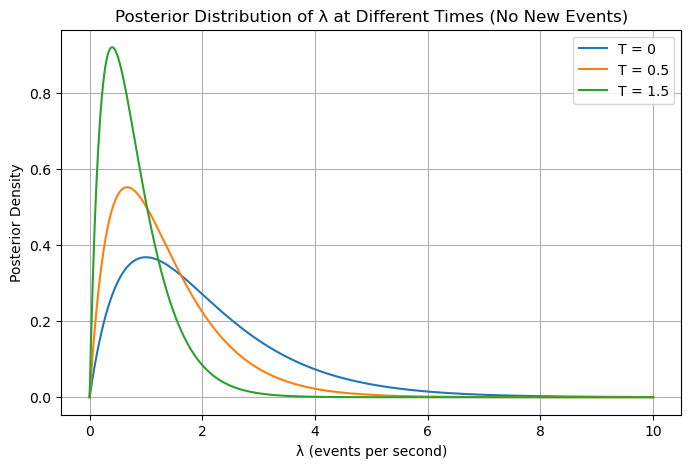

In [51]:
# observed data
n = 0  # initally there is no new event
time_values = [0, 0.5, 1.5]  
lambda_values = np.linspace(0, 10, 1000)

# plotting
plt.figure(figsize=(8, 5))

for time in time_values:
    # updated posterior parameters and posterior calculation of gamma
    alpha_post = alpha + n
    beta_post = beta + time
    posterior = gamma.pdf(lambda_values, a=alpha_post, scale=1/beta_post)
    plt.plot(lambda_values, posterior, label=f"T = {time}")

# Formatting the plot
plt.xlabel("λ (events per second)")
plt.ylabel("Posterior Density")
plt.title("Posterior Distribution of λ at Different Times (No New Events)")
plt.legend()
plt.grid(True)
plt.show()

EXplanation: the posterior distribution is $\text{Gamma}(2, 1)$ att $T = 0$. This is identical to the prior distribution since no time has elapsed and no new events have been observed. At $T = 0.5$, the posterior becomes $\text{Gamma}(2, 1.5)$. Realize that the plots shifted toward lower values of $\lambda$, more concentrated. By $T = 1.5$, the posterior further shifted $\text{Gamma}(2, 2.5)$. Even though no new events are observed ($n = 0$), the increase in observation time $T$ updates our beliefs by increasing the rate parameter $\beta' = \beta + T$. Since the $\beta$ parameter in mainly decides how spreadly the gamma function will be as we mentioned, the increase in it will reduce the variance and shifts the distribution toward lower $\lambda$.

## Section 6 — Custom probability distribution example

Design a small illustrative example (two variables with at least three values each) that demonstrates joint, conditional, and marginal probabilities. Include explanations, tables, or figures to convey the structure and dependencies.

Here is my problem definition: I generated a matrix of size 100 × 52, i.e., a matrix with 100 samples and 52 variables M100X52. The first 50 variables are independent and follow the standard normal distribution N (0, 1). Variable 51 is a binary variable and its values depend on these variables (columns) 4, 11, 18, 20, 33 and 46. If the summation of these values are greater than 0, then the value of the last variable is 1, otherwise, it is 0. Mathematically, for any row i: M [i, 51] =1 if M [i, 4] + M [i, 11] + M [i, 18] + M [i, 20] + M [i, 33]+ M[i,46] > 0, M [i, 51] =0 if M [i, 4] + M [i, 11] + M [i, 18] + M [i, 20] + M [i, 33]+ M[i,46] <= 0. The 52 variable is a continuous variable and its value is the summation of the six variables/columns (4, 11, 18, 20, 33 and 46) and a random noise term that follows a normal distri-bution N (0, 2). Mathematically, for any row i M [i, 52] = M [i, 4] + M [i, 11] + M [i, 18] + M [i, 20] + M [i, 33]+ M[i,46]+ ewhere e ∼ N (0, 2). I used these variables to get my main two random variables: pearson correlation coefficient and OLS regression coefficient. For 0 < j < 52,  I calculated the Pearson correlation coefficient between variable j and variable 52, to see whether how good Pearson correlation metric is under noised data. Secondly, I performed multiple linear regression using OLS model and used its coefficients as the metric for the linearity under noisy data. I also entered the actual contribitions of the variables under "Indicator" column.

In [55]:
import pandas as pd
# Creation of 100x52 matrix
num_var = 50
# I set a seed so you can also find the same result as me
np.random.seed(81)

# generate a 100x52 matrix with standard normal distribution and the first 10 variables are independent
M = np.random.normal(0, 1, (num_var * 2, num_var))

# create the 51st column
col_51 = (M[:, [3, 10, 17, 19,32,45]].sum(axis=1) > 0).astype(int)
M = np.column_stack((M, col_51))

# create the 52nd column
noise_added = np.random.normal(0, 2, num_var*2)
col_52 = (M[:, [3, 10, 17, 19,32,45]].sum(axis=1))
col_52 += noise_added
M = np.column_stack((M, col_52))

# create the dataframe from the merged version
columns = [f"Var_{i+1}" for i in range(num_var+2)]
M_df = pd.DataFrame(M, columns=columns)

# save it to .csv so you can run it yourself later and get the same result
M_df.to_csv("M100X52.csv", index=False)
M_df

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,...,Var_43,Var_44,Var_45,Var_46,Var_47,Var_48,Var_49,Var_50,Var_51,Var_52
0,-1.359900,-1.235402,0.059929,-1.654642,0.023669,-0.034070,-1.193858,-2.101865,0.368382,1.495400,...,0.430591,0.596679,-0.463205,1.649258,-1.091253,-0.179362,-0.917542,-1.030076,0.0,-0.211094
1,1.720971,-0.177390,-2.183665,1.160204,0.115935,-0.358671,0.645106,0.098274,-0.817969,-1.001343,...,-0.416264,-1.271252,0.463121,2.030028,-0.632348,0.138030,-1.314597,0.980004,1.0,4.676346
2,0.361517,-0.620040,0.080744,-1.120859,1.002999,0.175518,-2.538047,0.696709,-1.211369,-1.588147,...,-0.577328,-0.422879,0.821860,-0.451386,0.868699,-1.307843,-0.641125,0.094583,1.0,-1.502424
3,0.532587,0.673235,0.557144,1.720415,0.190867,-1.120332,-0.193137,0.537907,-0.310917,-0.359880,...,0.080738,0.928212,0.382593,1.171401,-0.234120,-0.405781,-0.256858,-0.719126,1.0,3.548105
4,-0.820135,-0.999077,-0.886661,0.020099,0.658241,-0.047263,0.946946,0.308051,-0.599196,-0.144030,...,0.152954,-0.114767,-0.480465,-0.283511,0.344340,-0.768529,1.035459,0.432786,1.0,-1.490295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.145334,0.386900,-0.411383,-1.400064,1.473954,0.614065,1.084811,-2.234749,0.481741,1.308478,...,0.470855,-0.603062,-1.077860,1.546248,1.459578,-0.440326,-1.143864,0.727942,0.0,-3.985187
96,-0.859656,0.598858,0.705282,-0.130294,1.206391,-0.128581,-1.631649,1.566910,-0.655279,0.450694,...,0.061305,-0.111343,0.045420,0.501356,-0.373673,1.274087,0.951368,-0.269487,1.0,0.451111
97,0.061769,-0.127253,-0.649716,0.557571,-1.129772,1.313117,0.297630,-0.291031,-0.182637,0.380701,...,-0.052514,0.340247,0.575947,-0.181847,-0.730715,-0.022772,-0.556541,1.172243,1.0,3.064160
98,1.467408,-0.504115,-1.712738,-1.690416,-1.514962,0.402903,-0.070634,-0.739504,-0.466102,0.589495,...,0.565702,-0.014793,1.376505,0.100865,-0.459122,-0.373574,0.147929,0.966791,0.0,-1.229822


In [56]:
# find the pearson correlations
# import library for computing the pearson coefficient
from scipy.stats import pearsonr

# store te correlation resut in this
corr_results = []

# iterate over col num 1 to 1001
for j in range(1, num_var +2):  
    col_name = f"Var_{j}" 
    # calculate the pearson coeff
    corr, _ = pearsonr(M_df[col_name], M_df["Var_52"])
    corr_results.append((col_name, corr))
    
corr_df = pd.DataFrame(corr_results, columns=["Variables","Pearson"])

In [57]:
# find the Multiple Linear Regression Coefficients
import statsmodels.api as sm
X = M_df.loc[:, M_df.columns != "Var_52"]
y = M_df["Var_52"]

# needdd to add constant to the model for linear regression
X = sm.add_constant(X)

# perform the multiple linear regression by using the OLS ()
model = sm.OLS(y, X).fit()
print(model.summary())

significant_vars = model.pvalues[model.pvalues < 0.1].index.tolist()
selected_significant = [var for var in significant_vars if var in X]
print(f"\nNumber of the five selected variables that are significant: {len(selected_significant)}")

                            OLS Regression Results                            
Dep. Variable:                 Var_52   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     3.890
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           2.60e-06
Time:                        02:06:25   Log-Likelihood:                -173.36
No. Observations:                 100   AIC:                             450.7
Df Residuals:                      48   BIC:                             586.2
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0140      0.589     -0.024      0.9

In [58]:
#Create the data
coefficients = model.params

# Create a DataFrame for the coefficients
coefficients_df = pd.DataFrame(coefficients, columns=["OLS Coefficient"]).reset_index()
coefficients_df = coefficients_df.rename(columns={"index": "Variables"})

# Assuming corr_df already exists and has columns ["Variables", "Pearson"]
# Merge the coefficients into corr_df based on the "Variables" column
corr_df = corr_df.merge(coefficients_df, on="Variables", how="left")

# Print the updated corr_df
print("\nUpdated corr_df with coefficients:")
print(corr_df)


Updated corr_df with coefficients:
   Variables   Pearson  OLS Coefficient
0      Var_1  0.149595        -0.073820
1      Var_2  0.112208         0.060670
2      Var_3 -0.232632        -0.768728
3      Var_4  0.450855         0.961083
4      Var_5  0.094875         0.046429
5      Var_6  0.031549        -0.312945
6      Var_7 -0.020257        -0.026668
7      Var_8  0.080159         0.437448
8      Var_9 -0.059695        -0.142734
9     Var_10  0.063285         0.125469
10    Var_11  0.257180         1.175701
11    Var_12  0.067930         0.268912
12    Var_13  0.065816        -0.137095
13    Var_14  0.029147        -0.013442
14    Var_15  0.077917        -0.030083
15    Var_16  0.021947        -0.421848
16    Var_17  0.123274         0.328746
17    Var_18  0.339774         1.301256
18    Var_19 -0.129663         0.206596
19    Var_20  0.333264         1.136793
20    Var_21  0.007511        -0.195034
21    Var_22  0.017973        -0.109451
22    Var_23  0.050802         0.137693
23  

In [59]:
# Ensure `num_rows` matches your data size
num_rows = 51  # Adjust if needed

# Create a DataFrame with "Variables" and "Indicator" columns
actual_df = pd.DataFrame({
    'Variables': [f"Var_{i}" for i in range(1, num_rows+1)],  # Generate variable names
    'Indicator': [0] * num_rows  # Initialize Indicator column with 0s
})

# Set specified rows to 1
rows_to_set = [3, 10, 17, 19, 32, 45]
actual_df.loc[rows_to_set, 'Indicator'] = 1

corr_df = corr_df.merge(actual_df, on="Variables", how="left")
corr_df

,Variables,Pearson,OLS Coefficient,Indicator
0,Var_1,0.149595,-0.073820,0
1,Var_2,0.112208,0.060670,0
2,Var_3,-0.232632,-0.768728,0
3,Var_4,0.450855,0.961083,1
4,Var_5,0.094875,0.046429,0
5,Var_6,0.031549,-0.312945,0
6,Var_7,-0.020257,-0.026668,0
7,Var_8,0.080159,0.437448,0
8,Var_9,-0.059695,-0.142734,0
9,Var_10,0.063285,0.125469,0


This will be my data. Now it is time to analyze it by binning. I chose the binning values intiutively.

In [61]:
# Pearson Correlation
pearson_bins = pd.cut(corr_df["Pearson"], bins=[-1, -0.3, -0.1, 0.1, 0.3, 1], 
                      labels=["Strong Negative", "Weak Negative", "Near Zero", "Weak Positive", "Strong Positive"])

# OLS Coefficient
ols_bins = pd.cut(corr_df["OLS Coefficient"], bins=[-2, -0.5, -0.1, 0.1, 0.5, 2],
                  labels=["Strong Negative", "Weak Negative", "Near Zero", "Weak Positive", "Strong Positive"])

# joint probability table P(Pearson, OLS)
joint_prob_table = pd.crosstab(pearson_bins, ols_bins, normalize=True)
print("Joint Probability Table:")
print(joint_prob_table)

# onditional probability: Given that Indicator = 1, compute joint probability
corr_df_important = corr_df[corr_df["Indicator"] == 1]

# Pearson Correlation and OLS Coefficient again for this subset
pearson_bins_important = pd.cut(corr_df_important["Pearson"], bins=[-1, -0.3, -0.1, 0.1, 0.3, 1], 
                                labels=["Strong Negative", "Weak Negative", "Near Zero", "Weak Positive", "Strong Positive"])

ols_bins_important = pd.cut(corr_df_important["OLS Coefficient"], bins=[-2, -0.5, -0.1, 0.1, 0.5, 2],
                            labels=["Strong Negative", "Weak Negative", "Near Zero", "Weak Positive", "Strong Positive"])

# conditional probability table P(Pearson, OLS | Indicator=1)
conditional_prob_table = pd.crosstab(pearson_bins_important, ols_bins_important, normalize=True)
print("\nConditional Probability Table (Given Indicator=1):")
print(conditional_prob_table)

# marginal probability for Pearson and OLS separately
pearson_marginal = pearson_bins.value_counts(normalize=True).sort_index()
ols_marginal = ols_bins.value_counts(normalize=True).sort_index()


print("\nMarginal Probability of Pearson Correlation:")
print(pearson_marginal)

print("\nMarginal Probability of OLS Coefficient:")
print(ols_marginal)

Joint Probability Table:
OLS Coefficient  Strong Negative  Weak Negative  Near Zero  Weak Positive  \
Pearson                                                                     
Weak Negative           0.019608       0.039216   0.000000       0.039216   
Near Zero               0.000000       0.235294   0.176471       0.196078   
Weak Positive           0.000000       0.000000   0.078431       0.039216   
Strong Positive         0.000000       0.019608   0.000000       0.000000   

OLS Coefficient  Strong Positive  
Pearson                           
Weak Negative           0.000000  
Near Zero               0.000000  
Weak Positive           0.078431  
Strong Positive         0.078431  

Conditional Probability Table (Given Indicator=1):
OLS Coefficient  Strong Positive
Pearson                         
Weak Positive           0.333333
Strong Positive         0.666667

Marginal Probability of Pearson Correlation:
Pearson
Strong Negative    0.000000
Weak Negative      0.098039
Near Zer

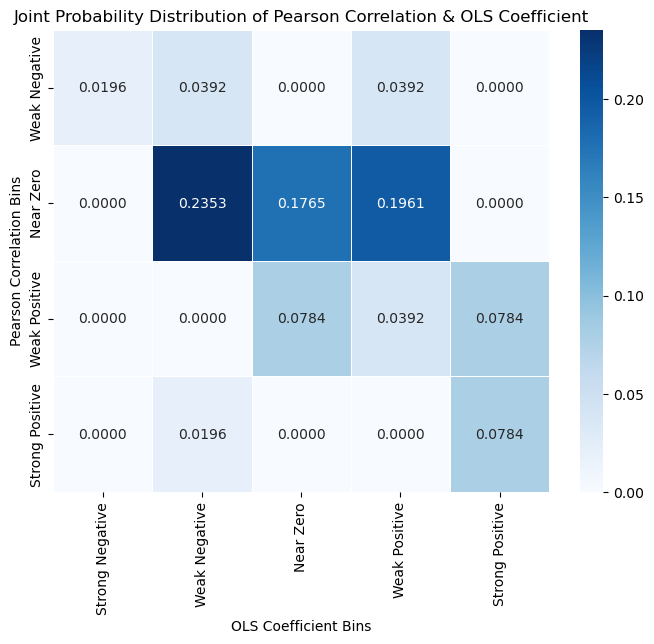

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

joint_prob_table = joint_prob_table.fillna(0)
# Plot heatmap for joint probability distribution
plt.figure(figsize=(8, 6))
sns.heatmap(joint_prob_table, annot=True, cmap="Blues", fmt=".4f", linewidths=0.5)
plt.title("Joint Probability Distribution of Pearson Correlation & OLS Coefficient")
plt.xlabel("OLS Coefficient Bins")
plt.ylabel("Pearson Correlation Bins")
plt.show()


The heatmap shows that most variables have little influence on the model, as they cluster around weak or near-zero correlations and small OLS coefficients. This suggests that many predictors don’t strongly affect the outcome. However, variables with higher positive correlations tend to have stronger regression effects, meaning they contribute more to the model. Only a few variables stand out with both strong correlations and large coefficients, indicating they play a more significant role in predicting the outcome.